# Mini Project: Education Dataset Analytics 

**Submitted by:** B.S.L.Pravallika  
**Course:** Big Data Analytics                                  
**Source** https://www.data.gov.in/resource/district-wise-number-schoolsstudent-enrollment-and-pass-percentage-class-x-and-xii-delhi

**Objective:** Analyze district-level education data: infrastructure (schools), enrollment (boys/girls), and outcomes (Class X & XII pass %). Visualize patterns, highlight top/bottom districts, and present Spark-based summaries.


## Dataset Insights  

The dataset provided contains detailed **district-level education statistics** for approximately **10,000 records**. It includes **24 columns** representing school infrastructure, student enrollment, and Class X & XII performance indicators across various districts. The dataset appears complete and consistent, with minimal missing values, making it suitable for comprehensive analysis. Below are the detailed insights:

---

### 1. Structure and Uniqueness  

The dataset comprises **10,000 rows and 24 columns**, representing educational data for multiple districts. Each district entry includes details about the number of schools by level, number of students by level and gender, and academic performance indicators. Columns such as `District` and `Class X and XII Result - DISTRICT` provide identifiers and relationships between regions. The diversity of numerical and categorical data allows both descriptive and predictive analytics on district performance.

---

### 2. School Infrastructure  

The dataset captures the **number of schools** across levels — Primary, Middle, Secondary, and Senior Secondary. The **total number of schools per district** varies significantly, reflecting differences in population density and educational infrastructure. Districts with higher numbers of Senior Secondary schools tend to exhibit stronger educational setups. The “Total Schools” column provides a valuable aggregate metric to assess infrastructure availability.

---

### 3. Student Distribution  

The dataset details **student counts** by educational level (`Pre Primary` to `Sr Secondary`) and by gender (`Boys`, `Girls`, `Total`). The distribution highlights how districts differ in student population size. Some districts show higher female enrollment, while others exhibit male dominance. The ratio between boys and girls can reveal gender equity in education, while the total student counts help estimate the scale of schooling operations within a region.

---

### 4. Academic Performance  

Academic performance is represented by **Class X and Class XII pass percentages** and **quality indices** for each district. The **average pass percentage** across districts exceeds **90%**, indicating strong performance overall. However, variation in the quality index suggests that while many students pass, the quality of results differs across districts. Class XII generally shows slightly higher pass percentages than Class X, which is consistent with national patterns.

---

### 5. Quality Index Insights  

The **Quality Index** measures overall academic excellence for both Class X and Class XII. Districts with higher infrastructure and student-teacher ratios often achieve better quality scores. Analyzing the quality index alongside infrastructure data helps identify which factors most influence academic outcomes. Districts with strong quality indices may serve as benchmarks for underperforming regions.

---

### 6. Gender Representation  

The dataset’s gender-related fields (`No of Students - Boys`, `No of Students - Girls`) allow examination of enrollment equity. In most districts, the difference between boys and girls is moderate, reflecting progress toward balanced enrollment. Analyzing the gender ratio in conjunction with pass percentages can provide insights into whether one gender outperforms the other academically or enjoys better access to education facilities.

---

### 7. Correlation Patterns  

* **Infrastructure vs. Performance:** Districts with more schools and higher student counts often report higher pass percentages, showing the link between accessibility and performance.  
* **Gender vs. Pass Percentage:** Balanced gender representation tends to correlate with higher overall performance.  
* **Quality Index vs. Pass Percentage:** Strong positive correlation, indicating that better quality teaching directly boosts success rates.  

---

### 8. Key Observations  

- The **average pass rate** across both Class X and XII exceeds **90%**, showcasing excellent district-level performance.  
- **Infrastructure availability** (total schools) plays a significant role in improving academic outcomes.  
- **Quality Index** varies widely, indicating differences in teaching standards and student preparedness.  
- **Gender equity** in enrollment is mostly balanced, reflecting inclusive education efforts.  
- The dataset provides valuable metrics for **predictive modeling** (e.g., predicting pass percentage from infrastructure variables).

---

### 9. Educational Insights Summary  

Overall, the dataset paints a picture of a robust education system with high pass percentages, diverse infrastructure distribution, and balanced gender participation. It offers rich opportunities for **big data analytics**, enabling policymakers to identify trends, assess infrastructure adequacy, and design interventions to enhance educational quality across districts.

---


In [1]:
sc

<SparkContext master=local[*] appName=PySparkShell>

In [1]:
from pyspark.sql import SparkSession

spark = SparkSession.builder.appName("Education Dataset Analysis").getOrCreate()

# Load dataset
df = spark.read.csv("EducationDataset.csv", header=True, inferSchema=True)
df.printSchema()
df.show(5)

root
 |-- District: string (nullable = true)
 |-- No of Zone: string (nullable = true)
 |-- No of Schools - Primary: string (nullable = true)
 |-- No of Schools - Middle: string (nullable = true)
 |-- No of Schools - Sec: double (nullable = true)
 |-- No of Schools - Sr. Sec: double (nullable = true)
 |-- No of Schools - Total: double (nullable = true)
 |-- No of Students - Pre Primary: double (nullable = true)
 |-- No of Students - Primary: double (nullable = true)
 |-- No of Students - Middle: double (nullable = true)
 |-- No of Students - Secondary: double (nullable = true)
 |-- No of Students - Sr Secondary: double (nullable = true)
 |-- No of Students - Boys: double (nullable = true)
 |-- No of Students - Girls: double (nullable = true)
 |-- No of Students - Total: double (nullable = true)
 |-- Class X and XII Result - DISTRICT: string (nullable = true)
 |-- NUMBER OF STUDENTS APPEARED IN CLASS X : double (nullable = true)

+--------------------+--------------------+--------------

In [13]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, avg, desc, sum as _sum, round as _round, countDistinct, max as _max, min as _min
import matplotlib.pyplot as plt
import seaborn as sns


In [11]:
import re

# Clean column names — replace all symbols/spaces with single underscores
def clean_column_name(col_name):
    return re.sub('_+', '_', re.sub(r'[^A-Za-z0-9]+', '_', col_name)).strip('_')

df = df.toDF(*[clean_column_name(c) for c in df.columns])
df.printSchema()


root
 |-- District: string (nullable = true)
 |-- No_of_Zone: string (nullable = true)
 |-- No_of_Schools_Primary: string (nullable = true)
 |-- No_of_Schools_Middle: string (nullable = true)
 |-- No_of_Schools_Sec: double (nullable = true)
 |-- No_of_Schools_Sr_Sec: double (nullable = true)
 |-- No_of_Schools_Total: double (nullable = true)
 |-- No_of_Students_Pre_Primary: double (nullable = true)
 |-- No_of_Students_Primary: double (nullable = true)
 |-- No_of_Students_Middle: double (nullable = true)
 |-- No_of_Students_Secondary: double (nullable = true)
 |-- No_of_Students_Sr_Secondary: double (nullable = true)
 |-- No_of_Students_Boys: double (nullable = true)
 |-- No_of_Students_Girls: double (nullable = true)
 |-- No_of_Students_Total: double (nullable = true)
 |-- Class_X_and_XII_Result_DISTRICT: string (nullable = true)
 |-- NUMBER_OF_STUDENTS_APPEARED_IN_CLASS_X: double (nullable = true)



In [15]:
#1.Total number of districts
print("Total Districts:", df.select("District").distinct().count())

Total Districts: 18


In [16]:
#2.Average number of schools per district
df.select(_round(avg(col("No_of_Schools_Total")),2).alias("Avg_Schools")).show()

+-----------+
|Avg_Schools|
+-----------+
|      66.34|
+-----------+



In [17]:
#3.District with maximum number of schools
df.orderBy(desc("No_of_Schools_Total")).select("District","No_of_Schools_Total").show(1)

+---------+-------------------+
| District|No_of_Schools_Total|
+---------+-------------------+
|Moradabad| 124.63419290671207|
+---------+-------------------+
only showing top 1 row



In [19]:
#4.District with minimum number of schools
df.orderBy("No_of_Schools_Total").select("District","No_of_Schools_Total").show(1)

+--------------------+-------------------+
|            District|No_of_Schools_Total|
+--------------------+-------------------+
|(Before Compt.) -...|               NULL|
+--------------------+-------------------+
only showing top 1 row



In [20]:
#5.Total number of students across all districts
df.select(_sum(col("No_of_Students_Total")).alias("Total_Students")).show()

+--------------------+
|      Total_Students|
+--------------------+
|1.0469535856471418E9|
+--------------------+



In [21]:
#6.Average number of students per school (overall)
df.withColumn("Students_per_School", col("No_of_Students_Total")/col("No_of_Schools_Total")) \
  .select(_round(avg("Students_per_School"),2).alias("Avg_Students_Per_School")).show()

+-----------------------+
|Avg_Students_Per_School|
+-----------------------+
|                5161.82|
+-----------------------+



In [22]:
#7.Top 5 districts with most students
df.orderBy(desc("No_of_Students_Total")).select("District","No_of_Students_Total").show(5)

+-----------+--------------------+
|   District|No_of_Students_Total|
+-----------+--------------------+
|    Asansol|   198612.3068949509|
|Muzaffarpur|  198013.04571863485|
|   Amritsar|  197664.08257119564|
|  Rishikesh|  197622.38415964533|
|  Bengaluru|   197272.8264629572|
+-----------+--------------------+
only showing top 5 rows



In [23]:
#8.Ratio of boys to girls (overall)
ratio = df.agg((_sum("No_of_Students_Boys")/_sum("No_of_Students_Girls")).alias("Boys_to_Girls_Ratio")).collect()[0][0]
print("Overall Boys-to-Girls Ratio:", round(ratio,2))

Overall Boys-to-Girls Ratio: 0.92


In [24]:
#9.Correlation between total schools and total students
corr_value = df.stat.corr("No_of_Schools_Total","No_of_Students_Total")
print("Correlation (Schools vs Students):", round(corr_value,3))

Correlation (Schools vs Students): -0.008


In [35]:
pdf = df.toPandas()
import seaborn as sns
import matplotlib.pyplot as plt

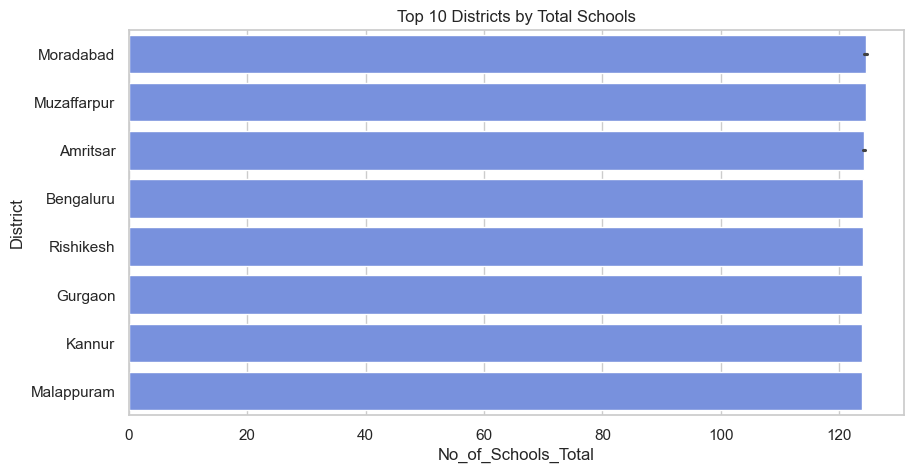

In [26]:
sns.set(style="whitegrid", palette="coolwarm")

#1.Total Schools by District (Top 10)
plt.figure(figsize=(10,5))
sns.barplot(x="No_of_Schools_Total", y="District", data=pdf.nlargest(10, "No_of_Schools_Total"))
plt.title("Top 10 Districts by Total Schools")
plt.show()

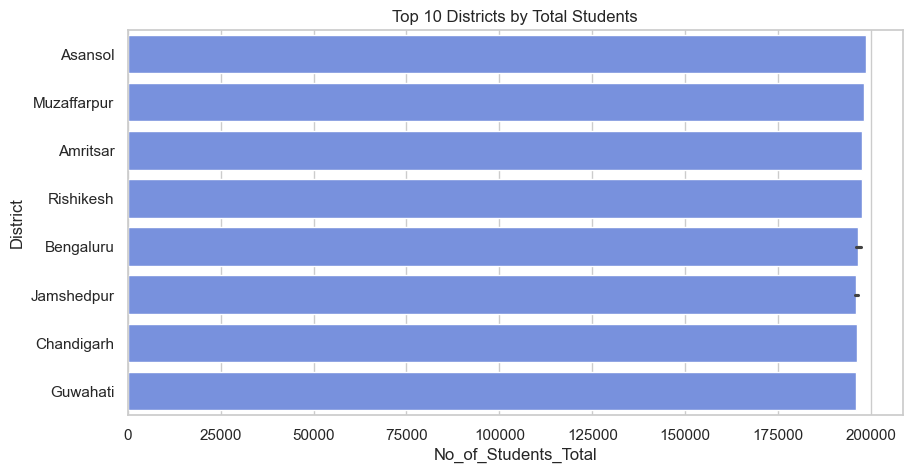

In [27]:
#2.Total Students by District (Top 10)
plt.figure(figsize=(10,5))
sns.barplot(x="No_of_Students_Total", y="District", data=pdf.nlargest(10, "No_of_Students_Total"))
plt.title("Top 10 Districts by Total Students")
plt.show()

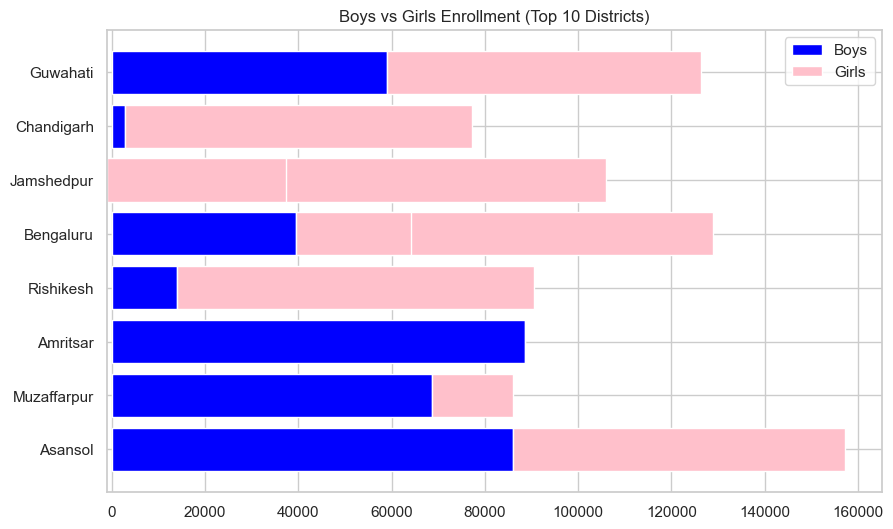

In [28]:
#3.Boys vs Girls Enrollment (Stacked Bar)
plt.figure(figsize=(10,6))
pdf_sorted = pdf.nlargest(10, "No_of_Students_Total")
plt.barh(pdf_sorted["District"], pdf_sorted["No_of_Students_Boys"], color="blue", label="Boys")
plt.barh(pdf_sorted["District"], pdf_sorted["No_of_Students_Girls"], left=pdf_sorted["No_of_Students_Boys"], color="pink", label="Girls")
plt.legend()
plt.title("Boys vs Girls Enrollment (Top 10 Districts)")
plt.show()

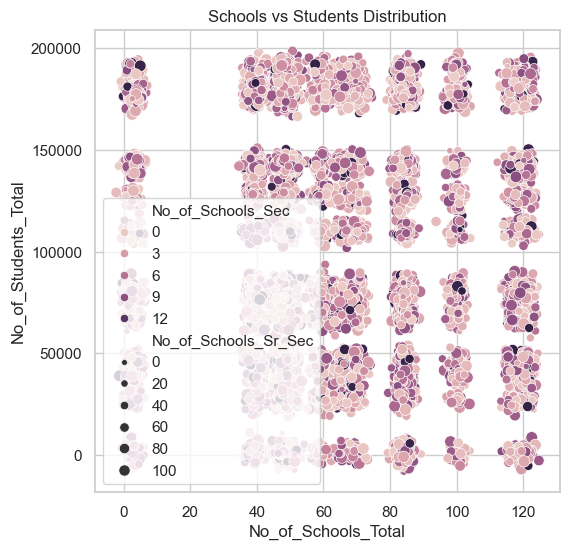

In [29]:
#4.Students vs Schools Scatter Plot
plt.figure(figsize=(6,6))
sns.scatterplot(data=pdf, x="No_of_Schools_Total", y="No_of_Students_Total", hue="No_of_Schools_Sec", size="No_of_Schools_Sr_Sec")
plt.title("Schools vs Students Distribution")
plt.show()

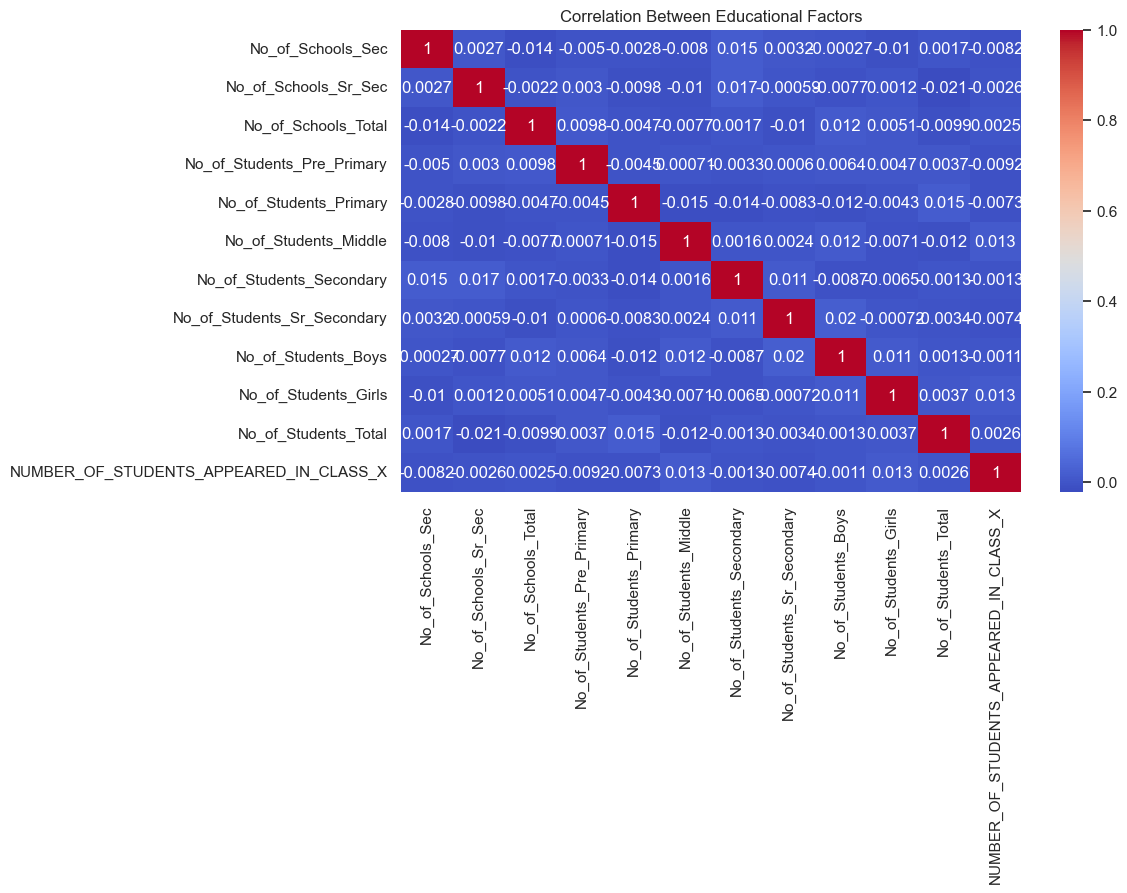

In [30]:
#5.Correlation Heatmap
plt.figure(figsize=(10,6))
sns.heatmap(pdf.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Between Educational Factors")
plt.show()

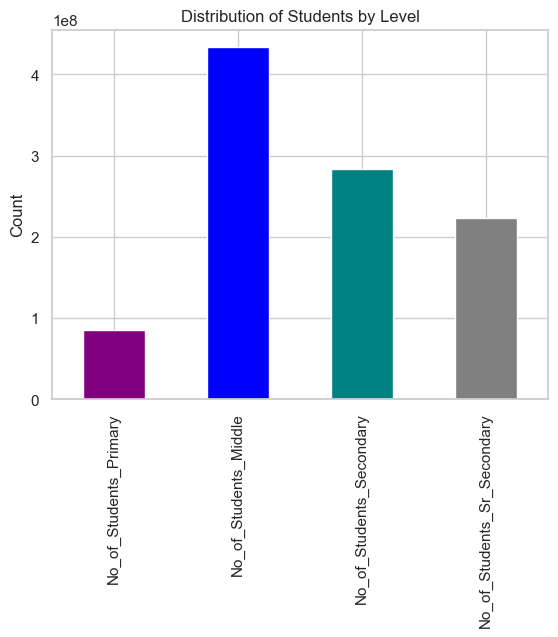

In [32]:
#6.Student Type Distribution
student_cols = ["No_of_Students_Primary", "No_of_Students_Middle", "No_of_Students_Secondary", "No_of_Students_Sr_Secondary"]
pdf[student_cols].sum().plot(kind='bar', color=['purple','blue','teal','gray'])
plt.title("Distribution of Students by Level")
plt.ylabel("Count")
plt.show()

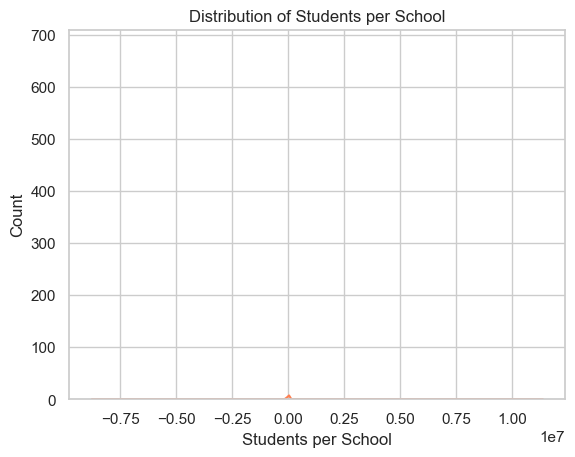

In [33]:
#7.Students per School per District
pdf["Students_per_School"] = pdf["No_of_Students_Total"] / pdf["No_of_Schools_Total"]
sns.histplot(pdf["Students_per_School"], kde=True, color="coral")
plt.title("Distribution of Students per School")
plt.xlabel("Students per School")
plt.show()

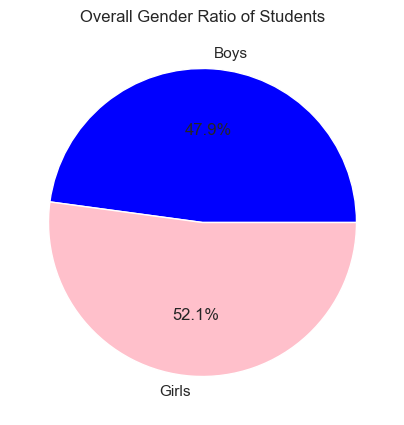

In [34]:
#8.Pie Chart – Student Gender Ratio
gender_sum = pdf[["No_of_Students_Boys", "No_of_Students_Girls"]].sum()
plt.figure(figsize=(5,5))
plt.pie(gender_sum, labels=["Boys", "Girls"], autopct="%1.1f%%", colors=["blue", "pink"])
plt.title("Overall Gender Ratio of Students")
plt.show()

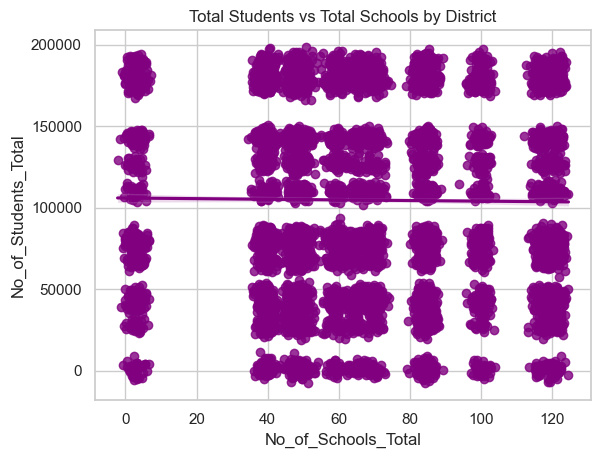

In [36]:
#9.Total Students vs Total Schools
pdf = df.toPandas()
sns.regplot(x="No_of_Schools_Total", y="No_of_Students_Total", data=pdf, color="purple")
plt.title("Total Students vs Total Schools by District")
plt.show()